# Import Module and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
event_data = pd.read_csv('data/all_user_event_data.csv')
profile_data = pd.read_csv('data/all_user_profile_data.csv')
repo_data = pd.read_csv('data/all_user_repo_data.csv')
starred_data = pd.read_csv('data/all_user_starred_data.csv')

In [3]:
def SelectNumericColumn(df):
    return df.select_dtypes(include=[np.number])

In [4]:
def PlotCorr(df, title):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()
    return corr

# Data Analysis

## Comparing High-Follower and Low-Follower Users

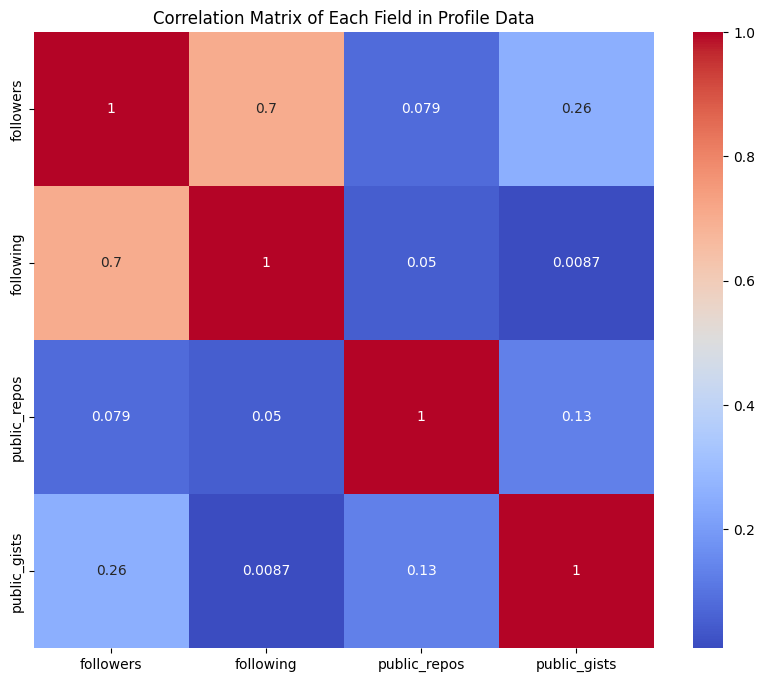

In [5]:
corr = PlotCorr(SelectNumericColumn(profile_data), title='Correlation Matrix of Each Field in Profile Data')

In [6]:
corr

,followers,following,public_repos,public_gists
followers,1.000000,0.702345,0.079321,0.255694
following,0.702345,1.000000,0.050371,0.008656
public_repos,0.079321,0.050371,1.000000,0.129804
public_gists,0.255694,0.008656,0.129804,1.000000


## Analyzing High-Follower Users Only

Selecting High-Followers User

In [7]:
threshold = 4
high_follower_users = profile_data[profile_data['followers'] > threshold]

In [8]:
high_follower_users.head()

,user_alias,type,hireable,location,followers,following,public_repos,public_gists,created_at,updated_at
2,usr2,User,NaN,Karachi,13.0,23.0,44.0,NaN,2023-01-03T13:56:42Z,2023-12-24T05:10:36Z
10,usr10,User,True,Ho Chi Minh City/Viet Nam,126.0,170.0,50.0,17.0,2015-05-07T09:55:21Z,2023-12-14T15:56:05Z
11,usr11,User,NaN,Valencia/Spain,7.0,4.0,18.0,NaN,2019-03-04T16:50:46Z,2023-11-12T21:11:04Z
14,usr14,User,NaN,Athens/Greece,8.0,14.0,7.0,NaN,2020-11-11T20:12:32Z,2024-01-04T14:49:09Z
19,usr19,User,True,Rajshahi/Bangladesh.,15.0,27.0,18.0,NaN,2017-04-16T11:38:35Z,2022-04-07T17:56:46Z


In [9]:
len(high_follower_users)

2988

Correlation Analysis

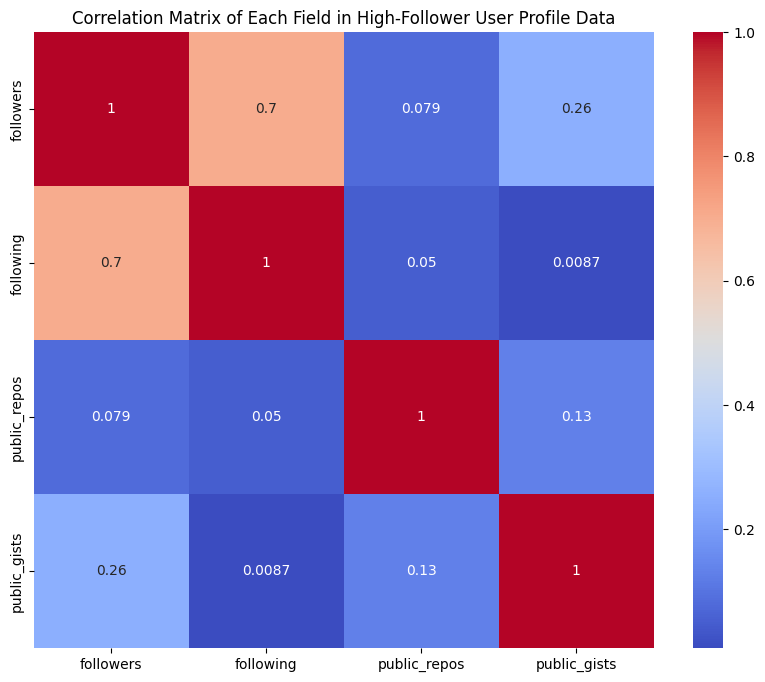

In [10]:
corr = PlotCorr(SelectNumericColumn(profile_data), title='Correlation Matrix of Each Field in High-Follower User Profile Data')

In [11]:
corr

,followers,following,public_repos,public_gists
followers,1.000000,0.702345,0.079321,0.255694
following,0.702345,1.000000,0.050371,0.008656
public_repos,0.079321,0.050371,1.000000,0.129804
public_gists,0.255694,0.008656,0.129804,1.000000


In [12]:
high_follower_aliases = high_follower_users['user_alias']

In [13]:
high_follower_aliases.head()

2      usr2
10    usr10
11    usr11
14    usr14
19    usr19
Name: user_alias, dtype: object

In [14]:
high_follower_event_data = event_data[event_data['user_alias'].isin(high_follower_aliases)]
high_follower_repo_data = repo_data[repo_data['user_alias'].isin(high_follower_aliases)]
high_follower_starred_data = starred_data[starred_data['user_alias'].isin(high_follower_aliases)]

...